In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/data_soyben_month_1.csv')
df.head()

,date,value
0,31/1/2002,4.355714
1,28/2/2002,4.359600
2,31/3/2002,4.449108
3,30/4/2002,4.507384
4,31/5/2002,4.573611


In [3]:
df=df.reset_index()['value']


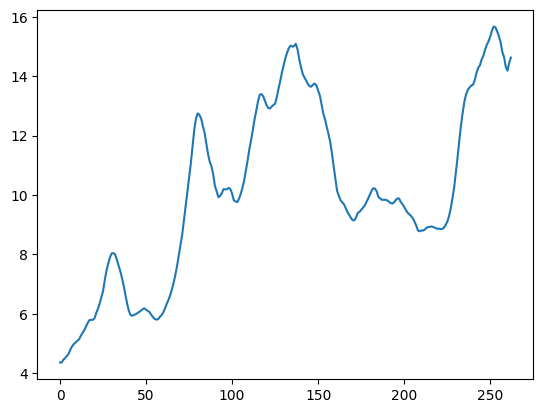

In [4]:
import matplotlib.pyplot as plt
plt.plot(df)


In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [6]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,test_size

(210, 53)

In [7]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [9]:
print(X_train.shape), print(y_train.shape)

(189, 20)
(189,)


(None, None)

In [10]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2022-12-14 13:45:35.101196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model=Sequential()
model.add(LSTM(10,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(10,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2022-12-14 13:45:41.298998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 6s 542ms/step - loss: 0.2717 - val_loss: 0.6414
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 0.2444 - val_loss: 0.5866
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.2162 - val_loss: 0.5291
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1875 - val_loss: 0.4676
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1564 - val_loss: 0.4013
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1255 - val_loss: 0.3300
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0947 - val_loss: 0.2557
Epoch 8/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0646 - val_loss: 0.1828
Epoch 9/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0406 - val_loss: 0.1179
Epoch 10/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0267 - val_loss: 0.0684
Epoch 11/100
3/3 [

In [14]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


In [15]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [16]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9.858681507259481

In [17]:
math.sqrt(mean_squared_error(ytest,test_predict))

12.619031760207518

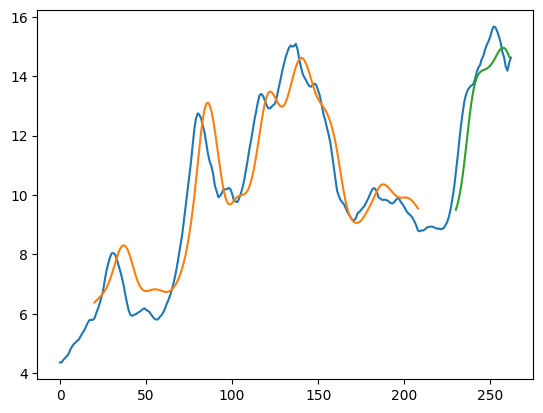

In [18]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
len(test_data)

53

In [20]:
x_input=test_data[33:].reshape(1,-1)
x_input.shape

(1, 20)

In [21]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [22]:
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<36):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.88228613]
21
1 day input [0.88452223 0.90209655 0.9129497  0.93148618 0.94532058 0.95608789
 0.97013969 0.98804622 1.         0.99748075 0.98571221 0.97093135
 0.95321298 0.92414269 0.90893035 0.87995734 0.86827482 0.89251644
 0.9072892  0.88228613]
1 day output [[0.8692196]]
2 day input [0.90209655 0.9129497  0.93148618 0.94532058 0.95608789 0.97013969
 0.98804622 1.         0.99748075 0.98571221 0.97093135 0.95321298
 0.92414269 0.90893035 0.87995734 0.86827482 0.89251644 0.9072892
 0.88228613 0.8692196 ]
2 day output [[0.85649806]]
3 day input [0.9129497  0.93148618 0.94532058 0.95608789 0.97013969 0.98804622
 1.         0.99748075 0.98571221 0.97093135 0.95321298 0.92414269
 0.90893035 0.87995734 0.86827482 0.89251644 0.9072892  0.88228613
 0.8692196  0.85649806]
3 day output [[0.84434074]]
4 day input [0.93148618 0.94532058 0.95608789 0.97013969 0.98804622 1.
 0.99748075 0.98571221 0.97093135 0.95321298 0.92414269 0.90893035
 0.87995734 0.86827482 0.89251644 0.9072892  0.882286

In [23]:
day_new=np.arange(1,21)
day_pred=np.arange(21,57)

In [24]:
import matplotlib.pyplot as plt

In [25]:
len(df1)

263

In [26]:
scaler.inverse_transform(lst_output)

array([[14.34524054],
       [14.1972971 ],
       [14.05325977],
       [13.91561068],
       [13.78315737],
       [13.65713617],
       [13.53630333],
       [13.41967285],
       [13.30732572],
       [13.19923293],
       [13.09338946],
       [12.98649861],
       [12.87705137],
       [12.76537101],
       [12.65198865],
       [12.53571854],
       [12.42071313],
       [12.3044653 ],
       [12.19136436],
       [12.08893974],
       [11.99341425],
       [11.89518526],
       [11.79813863],
       [11.70295057],
       [11.61027165],
       [11.52062016],
       [11.43444489],
       [11.35206236],
       [11.27369188],
       [11.1994988 ],
       [11.12959651],
       [11.06402278],
       [11.00274793],
       [10.94570582],
       [10.89285393],
       [10.84415515]])

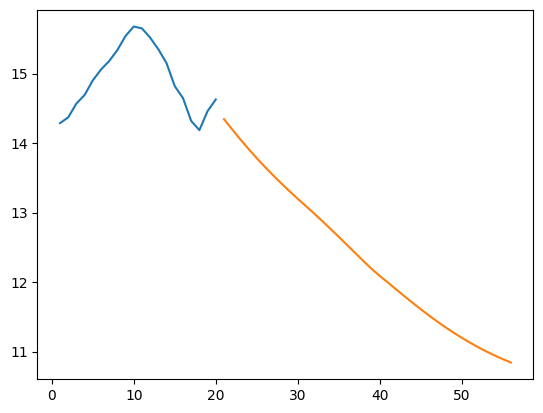

In [27]:
plt.plot(day_new,scaler.inverse_transform(df1[243:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

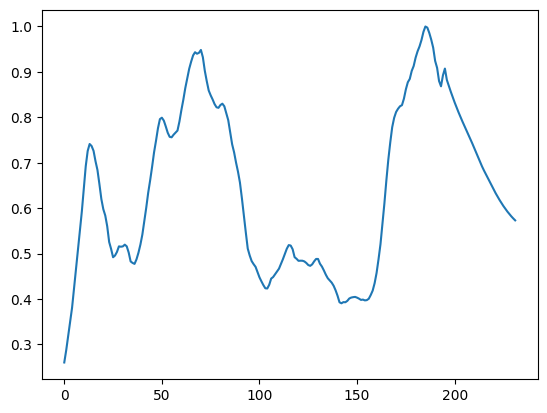

In [28]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[67:])

In [29]:
df3=scaler.inverse_transform(df3).tolist()

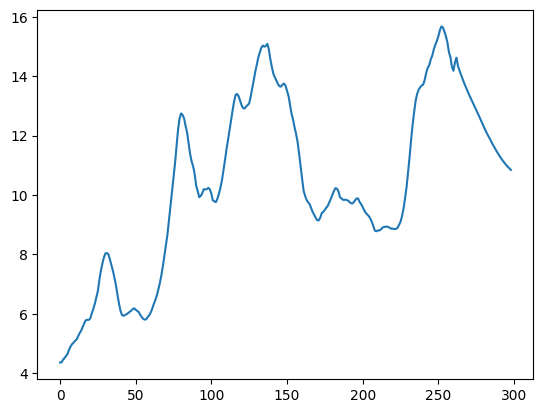

In [30]:
plt.plot(df3)

In [31]:
len(df3)

299

In [32]:
df3

[[4.355714286],
 [4.3596],
 [4.449108333],
 [4.507384146],
 [4.573610577],
 [4.648475806],
 [4.789469178],
 [4.896517857],
 [4.976210106],
 [5.027466825],
 [5.085640693],
 [5.13163745],
 [5.243914],
 [5.344758],
 [5.43198008],
 [5.550664],
 [5.677783999999999],
 [5.777944000000001],
 [5.793294000000001],
 [5.789528],
 [5.839968000000001],
 [6.011668],
 [6.158977999999999],
 [6.334011905],
 [6.540770916],
 [6.760796813],
 [7.131299603],
 [7.448974206],
 [7.687625],
 [7.893587649],
 [8.031674],
 [8.042404762],
 [7.996338645],
 [7.824618],
 [7.63074502],
 [7.437053785],
 [7.202183267],
 [6.947487999999999],
 [6.628502008000001],
 [6.337046],
 [6.090506],
 [5.953992032],
 [5.928641433999999],
 [5.960762948],
 [5.980354582],
 [6.021768924000001],
 [6.059966135],
 [6.098654762000001],
 [6.151189243],
 [6.182089640999999],
 [6.134214286],
 [6.093173307000001],
 [6.055414343],
 [5.964747011999999],
 [5.887434263000001],
 [5.824850598],
 [5.799123506],
 [5.814824700999999],
 [5.8922749],
 [5.94

In [44]:
import pandas as pd
date = pd.date_range('2002-01-01', periods=len(df3), freq='1M')
print(len(df3), len(date))

299 299


In [34]:
len(date[:263])

263

<AxesSubplot: title={'center': 'Three-year soybean price forecast'}, xlabel='Year', ylabel='U.S. Dollar / bushel'>

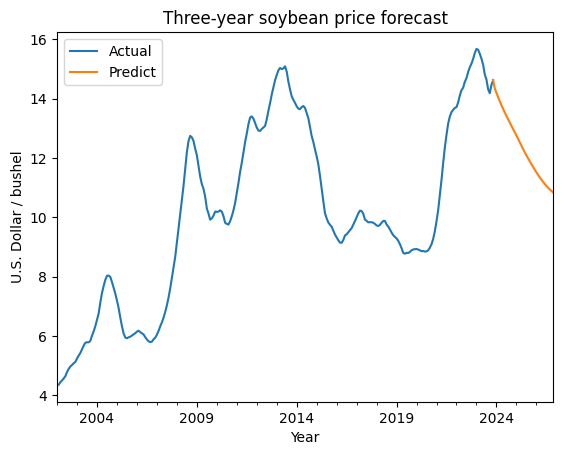

In [43]:
df_part = pd.DataFrame(
        index=date[0:263],
        columns=['Actual'],
        data=df3[0:263]
    )

df_future = pd.DataFrame(
        index=date[262:],
        columns=['Predict'],
        data=df3[262:]
    )

result = df_part.join(df_future, how='outer')
result.plot(title="Three-year soybean price forecast", xlabel="Year", ylabel="U.S. Dollar / bushel")
